# Clustering using numerical and categorical data : K-Prototypes

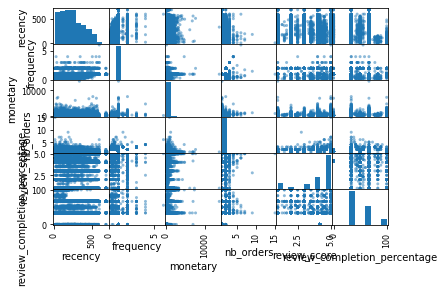

In [1]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes

rms = pd.read_csv("./../../../output/rms.csv")

pd.plotting.scatter_matrix(rms);

## Variables transformation from numerical to categorical

And what if we consider the frequency as a category ?

* It can be interesting to consider single order customers to the others ones.
* Also, we could consider customers who contribute reviews (title, message) from the one who don't.
* As monetary is really skewed, we may introduce bins.

Let's try this and see if we can have a better clustering after that !

In [2]:
rms["order_behavior"] = "Mono"
rms.loc[rms["nb_orders"] > 1, "order_behavior"] = "Multiple"
rms["review_behavior"] = "Silent"
rms.loc[rms.review_completion_percentage > 1 / 3, "review_behavior"] = "Contributor"
rms.loc[
    rms.review_completion_percentage > 2 / 3, "review_behavior"
] = "Best Contributor"

rms.order_behavior = rms.order_behavior.astype("category")
rms.review_behavior = rms.review_behavior.astype("category")

rms

,recency,frequency,monetary,nb_orders,review_score,review_completion_percentage,order_behavior,review_behavior
0,112.0,1.0,141.90,1.0,5.0,100.000000,Mono,Best Contributor
1,115.0,1.0,27.19,1.0,4.0,33.333333,Mono,Best Contributor
2,537.0,1.0,86.22,1.0,3.0,33.333333,Mono,Best Contributor
3,321.0,1.0,43.62,1.0,4.0,66.666667,Mono,Best Contributor
4,288.0,1.0,196.89,1.0,5.0,33.333333,Mono,Best Contributor
...,...,...,...,...,...,...,...,...
93331,447.0,1.0,2067.42,1.0,5.0,33.333333,Mono,Best Contributor
93332,262.0,1.0,84.58,1.0,4.0,33.333333,Mono,Best Contributor
93333,568.0,1.0,112.46,1.0,5.0,33.333333,Mono,Best Contributor
93334,119.0,1.0,133.69,1.0,5.0,100.000000,Mono,Best Contributor


Let's plot the distribution of monetary :

In [3]:
rms.monetary.describe()

count    93336.000000
mean       165.169348
std        226.313356
min          9.590000
25%         63.010000
50%        107.780000
75%        182.495000
max      13664.080000
Name: monetary, dtype: float64

In [4]:
rms["monetary_decile"] = pd.qcut(rms.monetary, 10, labels=False) + 1
rms["monetary_decile"] = rms["monetary_decile"].astype("category")

rms.head()

,recency,frequency,monetary,nb_orders,review_score,review_completion_percentage,order_behavior,review_behavior,monetary_decile
0,112.0,1.0,141.90,1.0,5.0,100.000000,Mono,Best Contributor,7
1,115.0,1.0,27.19,1.0,4.0,33.333333,Mono,Best Contributor,1
2,537.0,1.0,86.22,1.0,3.0,33.333333,Mono,Best Contributor,4
3,321.0,1.0,43.62,1.0,4.0,66.666667,Mono,Best Contributor,2
4,288.0,1.0,196.89,1.0,5.0,33.333333,Mono,Best Contributor,8


In [5]:
rms.describe()

,recency,frequency,monetary,nb_orders,review_score,review_completion_percentage
count,93336.000000,93336.000000,93336.000000,93336.000000,93336.000000,93336.000000
mean,237.903853,1.004460,165.169348,1.033417,4.153608,50.460169
std,152.552964,0.140078,226.313356,0.209098,1.275972,22.546808
min,1.000000,0.095238,9.590000,1.000000,1.000000,0.000000
25%,114.000000,1.000000,63.010000,1.000000,4.000000,33.333333
50%,219.000000,1.000000,107.780000,1.000000,5.000000,33.333333
75%,346.000000,1.000000,182.495000,1.000000,5.000000,66.666667
max,714.000000,6.000000,13664.080000,15.000000,5.000000,100.000000


## Using K-Prototype clustering method

We have to evaluate the right number of clusters even if we are confident it's around **5** as stated by our previous experiments.

In [6]:
from scipy.stats import boxcox


def transform_using_boxcox(x):
    xt, _ = boxcox(x)
    return xt


# Process numerical variables
cleaned_rms = rms.copy()
cleaned_rms = cleaned_rms.drop(columns=["review_completion_percentage"])

rms_boxcox = cleaned_rms[
    cleaned_rms.select_dtypes(exclude=["object", "category"]).columns
].apply(transform_using_boxcox, axis=0)

rms_boxcox["order_behavior"] = rms["order_behavior"]
rms_boxcox["review_behavior"] = rms["review_behavior"]
rms_boxcox["monetary_decile"] = rms["monetary_decile"]

rms_boxcox

,recency,frequency,monetary,nb_orders,review_score,order_behavior,review_behavior,monetary_decile
0,22.138764,0.0,3.129194,0.0,30.664944,Mono,Best Contributor,7
1,22.486317,0.0,2.409127,0.0,16.373956,Mono,Best Contributor,1
2,54.451711,0.0,2.936803,0.0,7.189493,Mono,Best Contributor,4
3,40.698300,0.0,2.640230,0.0,16.373956,Mono,Best Contributor,2
4,38.258743,0.0,3.245508,0.0,30.664944,Mono,Best Contributor,8
...,...,...,...,...,...,...,...,...
93331,49.101399,0.0,3.888275,0.0,30.664944,Mono,Best Contributor,10
93332,36.245502,0.0,2.928992,0.0,16.373956,Mono,Best Contributor,4
93333,56.198296,0.0,3.041813,0.0,30.664944,Mono,Best Contributor,6
93334,22.943360,0.0,3.107187,0.0,30.664944,Mono,Best Contributor,7


In [ ]:
from kmodes.kprototypes import KPrototypes
import seaborn as sns

costs = []

for n_clusters in list(range(3, 7)):
    k_prototypes = KPrototypes(
        n_clusters=n_clusters, init="Huang", random_state=42, n_jobs=-1
    )
    k_prototypes.fit_predict(rms_boxcox, categorical=[5, 6, 7])
    costs.append({"n_clusters": n_clusters, "cost": k_prototypes.cost_})

pd.DataFrame(costs).plot(title="Cost per number of clusters", x="n_clusters", y="cost");

In [ ]:
from sklearn import metrics

k_prototypes = KPrototypes(
    n_clusters=5, init="Huang", verbose=0, random_state=42, n_jobs=-1
)
rms["cluster"] = k_prototypes.fit_predict(rms_boxcox, categorical=[5, 6, 7])
rms["cluster"] = rms.cluster.astype("category")


print(rms["cluster"].value_counts())

print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(rms_boxcox, rms["cluster"])
)

sns.pairplot(rms, hue="cluster", palette="Dark2", diag_kind="kde");

We have a really good segmentation on the recency/review_score couple !

## Clustering visualisation

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# Create dummies for categorical variables

rms = pd.get_dummies(
    rms,
    prefix="",
    prefix_sep="",
    columns=["order_behavior", "review_behavior", "monetary_decile"],
)

tsne = TSNE(n_components=2, learning_rate="auto", init="random", n_jobs=-1)
projected_customers = tsne.fit_transform(rms)


fig = px.scatter(
    projected_customers,
    x=0,
    y=1,
    color=rms.cluster,
    labels={"color": "cluster"},
    opacity=0.8,
)
fig.show()